# Data Collection & Preprocessing

## EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   0       145   233    1        2      150      0      2.3   
1     67    1   3       160   286    0        2      108      1  

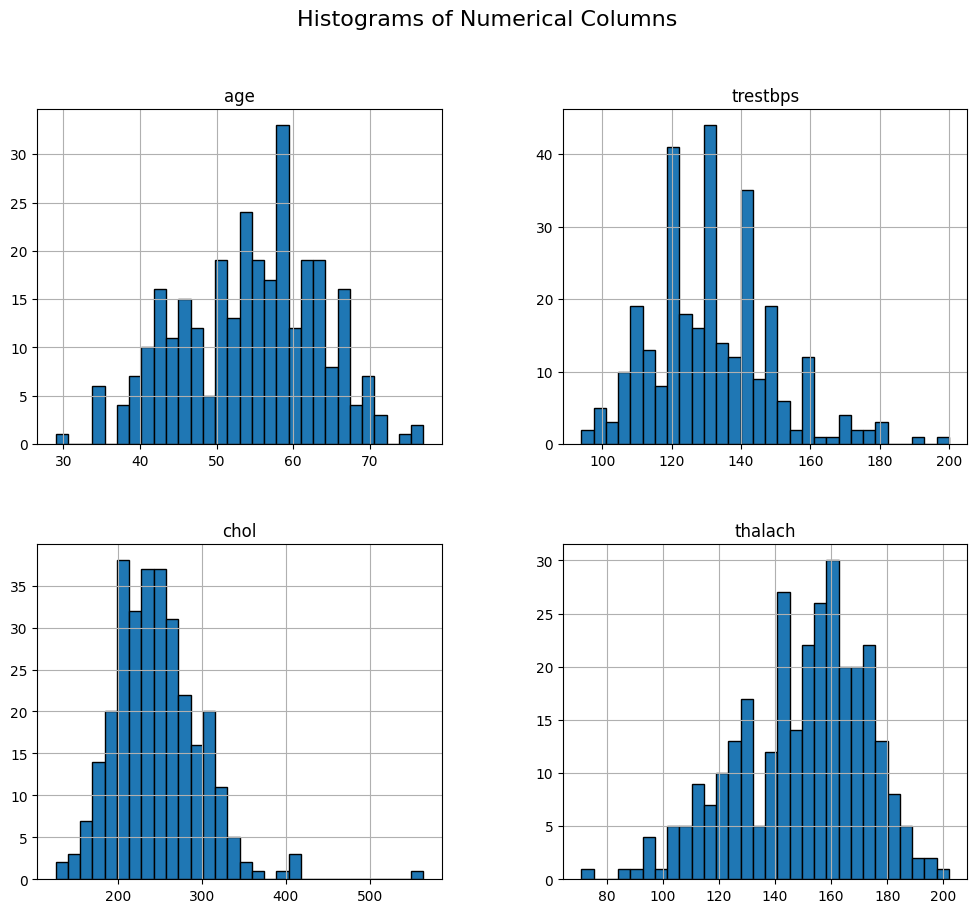

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

first_heart_csv = "Heart_disease_cleveland_new.csv"

df = pd.read_csv(first_heart_csv)
df.drop_duplicates(inplace = True)
df.info()
print("\n",df)

column_names = ['age', 'trestbps', 'chol', 'thalach']

df[column_names].hist(figsize=(12, 10), bins=30, edgecolor='black')

plt.suptitle("Histograms of Numerical Columns", fontsize=16)
plt.show()

The lower and upper bound are 
 resting_bps      90.00
cholestrol      115.00
restecg          -3.00
max_heart_rt     84.75
oldpeak          -2.40
slope            -1.50
target           -1.50
dtype: float64 

 resting_bps     170.00
cholestrol      371.00
restecg           5.00
max_heart_rt    214.75
oldpeak           4.00
slope             2.50
target            2.50
dtype: float64


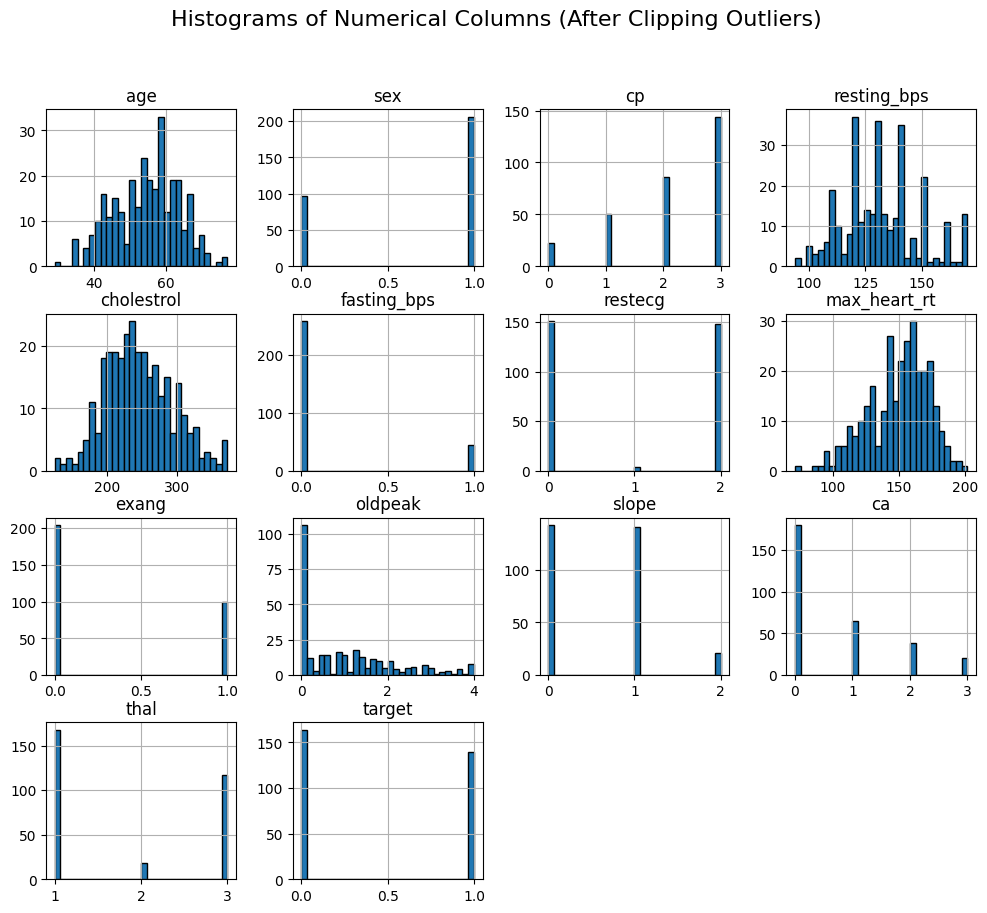

     age  sex  cp  resting_bps  cholestrol  fasting_bps  restecg  \
0     63    1   0          145         233            1        2   
1     67    1   3          160         286            0        2   
2     67    1   3          120         229            0        2   
3     37    1   2          130         250            0        0   
4     41    0   1          130         204            0        2   
..   ...  ...  ..          ...         ...          ...      ...   
298   45    1   0          110         264            0        0   
299   68    1   3          144         193            1        0   
300   57    1   3          130         131            0        0   
301   57    0   1          130         236            0        2   
302   38    1   2          138         175            0        0   

     max_heart_rt  exang  oldpeak  slope  ca  thal  target  
0             150      0      2.3      2   0     2       0  
1             108      1      1.5      1   3     1       1  


In [3]:
import matplotlib.pyplot as plt
df.rename(columns={'trestbps': 'resting_bps','chol':'cholestrol','fbs':'fasting_bps','thalach':'max_heart_rt'}, inplace=True)

Q1 = df[['resting_bps', 'cholestrol', 'restecg', 'max_heart_rt', 'oldpeak', 'slope', 'target']].quantile(0.25)
Q3 = df[['resting_bps', 'cholestrol', 'restecg', 'max_heart_rt', 'oldpeak', 'slope', 'target']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("The lower and upper bound are \n",lower_bound,"\n\n",upper_bound)
df_clipped = df.copy()
columns_to_clip = ['resting_bps', 'cholestrol', 'restecg', 'max_heart_rt', 'oldpeak', 'slope', 'target']

df_clipped[columns_to_clip] = df[columns_to_clip].clip(lower=0, upper=upper_bound, axis=1)

df_clipped.hist(figsize=(12, 10), bins=30, edgecolor='black')

plt.suptitle("Histograms of Numerical Columns (After Clipping Outliers)", fontsize=16)
plt.show()

print(df_clipped)

df.to_csv("Heart_disease_eda.csv", index = False)
print("Saved eda completed csv")

## Normalization

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

first_heart_csv = "Heart_disease_eda.csv"
df = pd.read_csv(first_heart_csv)
X1 = df.iloc[:, :-1]
y1 = df.iloc[:, -1]
scaleMinMax_1 = MinMaxScaler(feature_range=(0, 1)) #normalize to value between 0 and 1
X = scaleMinMax_1.fit_transform(X1)

X1_normalized = pd.DataFrame(X, columns= X1.columns)
X1_normalized['target'] = y1

print(X1_normalized.head())
print(X1_normalized.describe().round(3))
X1_normalized.to_csv("heart_normalized.csv", index=False)

print("\nThe whole dataset:\n", X1_normalized)

        age  sex        cp  resting_bps  cholestrol  fasting_bps  restecg  \
0  0.708333  1.0  0.000000     0.481132    0.244292          1.0      1.0   
1  0.791667  1.0  1.000000     0.622642    0.365297          0.0      1.0   
2  0.791667  1.0  1.000000     0.245283    0.235160          0.0      1.0   
3  0.166667  1.0  0.666667     0.339623    0.283105          0.0      0.0   
4  0.250000  0.0  0.333333     0.339623    0.178082          0.0      1.0   

   max_heart_rt  exang   oldpeak  slope        ca  thal  target  
0      0.603053    0.0  0.370968    1.0  0.000000   0.5       0  
1      0.282443    1.0  0.241935    0.5  1.000000   0.0       1  
2      0.442748    1.0  0.419355    0.5  0.666667   1.0       1  
3      0.885496    0.0  0.564516    1.0  0.000000   0.0       0  
4      0.770992    0.0  0.225806    0.0  0.000000   0.0       0  
           age      sex       cp  resting_bps  cholestrol  fasting_bps  \
count  303.000  303.000  303.000      303.000     303.000      303.

# Model Selection & Training

## Random Forest 

### Using RandomizedSearchCV for parameter calculation

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
import joblib

# Load the dataset
df1 = pd.read_csv("heart_normalized.csv")
print(df1.head())

# Split the input and output
X1 = df1.drop(columns=["target"])
y1 = df1["target"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
print("Number of rows and columns in train and test data ", X_train.shape, X_test.shape)

# RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# This does the randomized search process as well as calculates the best model
random_search.fit(X_train, y_train)

# Get the best parameters from the random search
best_params = random_search.best_params_
print(f"Best Parameters Found: {best_params}")

# Get the best model
rf_model_updated = random_search.best_estimator_


# Predict using the rf model
y_pred_updated = rf_model_updated.predict(X_test)

print("Predicted values (First five): ", y_pred_updated[:5])

accuracy = accuracy_score(y_test, y_pred_updated)
precision = precision_score(y_test, y_pred_updated)
f1 = f1_score(y_test, y_pred_updated)
recall = recall_score(y_test, y_pred_updated)

# Get the predicted probabilities for the  model
y_proba_updated = rf_model_updated.predict_proba(X_test)

print("Predicted Probabilities for the first 5 samples:")
print(y_proba_updated[:5])

# Evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1: {f1:.4f}")

# Save the updated model
joblib.dump(rf_model_updated, 'random_forest_model_RandomizedSearchCV.pkl')
print("THe Random Forest model has been saved successfully!")

        age  sex        cp  resting_bps  cholestrol  fasting_bps  restecg  \
0  0.708333  1.0  0.000000     0.481132    0.244292          1.0      1.0   
1  0.791667  1.0  1.000000     0.622642    0.365297          0.0      1.0   
2  0.791667  1.0  1.000000     0.245283    0.235160          0.0      1.0   
3  0.166667  1.0  0.666667     0.339623    0.283105          0.0      0.0   
4  0.250000  0.0  0.333333     0.339623    0.178082          0.0      1.0   

   max_heart_rt  exang   oldpeak  slope        ca  thal  target  
0      0.603053    0.0  0.370968    1.0  0.000000   0.5       0  
1      0.282443    1.0  0.241935    0.5  1.000000   0.0       1  
2      0.442748    1.0  0.419355    0.5  0.666667   1.0       1  
3      0.885496    0.0  0.564516    1.0  0.000000   0.0       0  
4      0.770992    0.0  0.225806    0.0  0.000000   0.0       0  
Number of rows and columns in train and test data  (242, 13) (61, 13)
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Param

### Using GridSearchCV for better parameter calculation

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# This will take more time but we get better results. So keep this as seperate notebook cell.
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [11]:
rf_model_grid_search_updated = grid_search.best_estimator_
y_pred_updated = rf_model_grid_search_updated.predict(X_test)

print("The test input values:\n", X_test[:5])
y_pred_updated = rf_model_updated.predict(X_test)

print("Actual result values:\n", df1.loc[X_test.index[:5], "target"])

print("Predicted values (First five): ", y_pred_updated[:5])

accuracy = accuracy_score(y_test, y_pred_updated)
precision = precision_score(y_test, y_pred_updated)
f1 = f1_score(y_test, y_pred_updated)
recall = recall_score(y_test, y_pred_updated)

# Get the predicted probabilities for the updated model
y_proba_updated = rf_model_grid_search_updated.predict_proba(X_test)

# Print the predicted probabilities for the first few samples of the updated model
print("Predicted Probabilities for the first 5 samples :")
print(y_proba_updated[:5])

# Evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1: {f1:.4f}")

# Save the updated model if needed
joblib.dump(rf_model_grid_search_updated, 'random_forest_model_GridSearchCV.pkl')
print("Updated Random Forest model using GridSearchCV saved successfully.")


The test input values:
           age  sex        cp  resting_bps  cholestrol  fasting_bps  restecg  \
179  0.500000  1.0  0.666667     0.339623    0.273973          1.0      1.0   
228  0.520833  1.0  1.000000     0.150943    0.182648          0.0      1.0   
111  0.562500  1.0  1.000000     0.292453    0.280822          1.0      1.0   
246  0.604167  1.0  1.000000     0.056604    0.246575          0.0      0.0   
60   0.458333  0.0  1.000000     0.339623    0.408676          0.0      0.0   

     max_heart_rt  exang   oldpeak  slope        ca  thal  
179      0.778626    0.0  0.000000    0.0  1.000000   0.0  
228      0.282443    1.0  0.000000    0.5  0.333333   0.0  
111      0.557252    1.0  0.193548    0.5  0.333333   0.0  
246      0.648855    0.0  0.016129    0.0  0.333333   1.0  
60       0.541985    1.0  0.193548    0.5  0.000000   1.0  
Actual result values:
 179    0
228    1
111    1
246    1
60     1
Name: target, dtype: int64
Predicted values (First five):  [0 1 1 1 1]
Pr

## XGBOOST

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
import numpy as np
df = pd.read_csv("heart_normalized.csv")
x=df.drop(columns=['target'])
y=df["target"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Number of rows and columns in train and test data ",X_train.shape, X_test.shape)

model = xgb.XGBClassifier(
    max_depth=5,
    n_estimators=100,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

print("The test input values (First five):\n", X_test[:5])

print("Actual result values:\n", df.loc[X_test.index[:5], "target"])

y_pred = model.predict(X_test)

print("Predicted values (First five): ", y_pred[:5])

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1: {f1:.4f}")


joblib.dump(rf_model_grid_search_updated, 'xgboost_model.pkl')
print("The xgboost model has been saved successfully.")

Number of rows and columns in train and test data  (242, 13) (61, 13)
The test input values (First five):
           age  sex        cp  resting_bps  cholestrol  fasting_bps  restecg  \
179  0.500000  1.0  0.666667     0.339623    0.273973          1.0      1.0   
228  0.520833  1.0  1.000000     0.150943    0.182648          0.0      1.0   
111  0.562500  1.0  1.000000     0.292453    0.280822          1.0      1.0   
246  0.604167  1.0  1.000000     0.056604    0.246575          0.0      0.0   
60   0.458333  0.0  1.000000     0.339623    0.408676          0.0      0.0   

     max_heart_rt  exang   oldpeak  slope        ca  thal  
179      0.778626    0.0  0.000000    0.0  1.000000   0.0  
228      0.282443    1.0  0.000000    0.5  0.333333   0.0  
111      0.557252    1.0  0.193548    0.5  0.333333   0.0  
246      0.648855    0.0  0.016129    0.0  0.333333   1.0  
60       0.541985    1.0  0.193548    0.5  0.000000   1.0  
Actual result values:
 179    0
228    1
111    1
246    1